In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


In [2]:
start = '2012-01-01'
end = '2022-12-31'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)


In [4]:
data


Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.513794,16.581795,16.190173,16.204321,147611217
1,2012-01-04,16.585020,16.633911,16.394919,16.504364,114989399
2,2012-01-05,16.354961,16.478056,16.285969,16.432392,131808205
3,2012-01-06,16.131855,16.379533,16.126146,16.358437,108119746
4,2012-01-09,15.447884,16.056905,15.417357,16.044495,233776981
...,...,...,...,...,...,...
2763,2022-12-23,89.488457,89.777419,87.306303,87.306303,17815000
2764,2022-12-27,87.615196,89.179575,87.221614,88.990253,15470900
2765,2022-12-28,86.150452,88.203074,86.060778,87.186729,17879600


In [5]:
data.dropna(inplace=True)

In [6]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.8)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.8): len(data)])


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [8]:
data_train_scale = scaler.fit_transform(data_train)

In [9]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [10]:
import numpy as np
x , y = np.array(x), np.array(y)

In [11]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [12]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 80, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

C:\Users\jerem\OneDrive\Desktop\sav2\env\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [14]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

k = 2  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

mse_scores = []

for train_index, val_index in kf.split(x):
    X_train, X_val = x[train_index], x[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    
    model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)
    
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    mse_scores.append(mse)
    
    print(f'MSE: {mse}')

print(f'Average MSE: {np.mean(mse_scores)}')

Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 12s 127ms/step - loss: 0.1081
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - loss: 0.0183
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - loss: 0.0205
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - loss: 0.0093
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - loss: 0.0085
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - loss: 0.0094
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - loss: 0.0070
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - loss: 0.0073
Epoch 9/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - loss: 0.0067
Epoch 10/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - loss: 0.0059
Epoch 11/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - loss: 0.0075
Epoch 12/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - loss: 0.0058
Epoch 13/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - loss: 0.0055
Epoch 14/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - loss: 0.0063
Epoch 15/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - l

In [15]:
print(f'MSE scores for each fold: {mse_scores}')
print(f'Average MSE across all folds: {np.mean(mse_scores)}')
print(f'Standard deviation of MSE across all folds: {np.std(mse_scores)}')

MSE scores for each fold: [0.0018008110669054333, 0.0014621535446741427]
Average MSE across all folds: 0.001631482305789788
Standard deviation of MSE across all folds: 0.00016932876111564528


In [16]:
pas_100_days = data_train.tail(100)

In [17]:
data_test = pd.concat([pas_100_days, data_test], ignore_index = True)

In [18]:
data_test

Ticker,GOOG
0,71.190208
1,71.334694
2,71.703362
3,71.561874
4,70.356201
...,...
649,89.488457
650,87.615196
651,86.150452
652,88.631538


In [19]:
data_test_scale = scaler.fit_transform(data_test)

In [20]:
import numpy as np
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [21]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


In [22]:
scale = 1/scaler.scale_

In [23]:
y_predict = y_predict*scale

In [24]:
y = y*scale

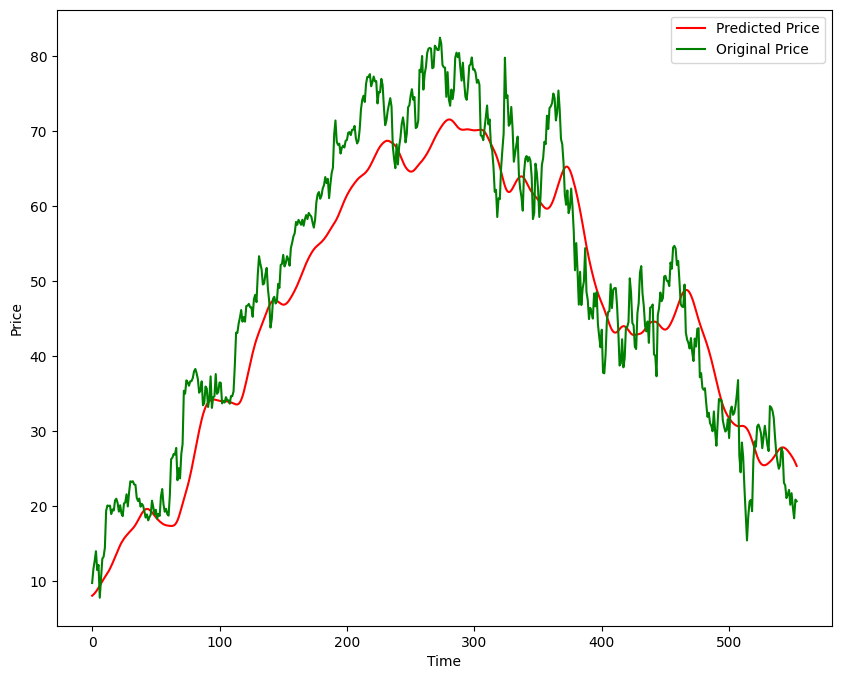

In [25]:
plt.figure(figsize = (10, 8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label ='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()